# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [28]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


** A set of percentiles (5,25,75,95) have been calculated for each feature **
This will be used to identify samples

In [26]:
import numpy as np

fresh_5 = np.percentile(data['Fresh'],5)
fresh_25 = np.percentile(data['Fresh'],25)
fresh_75 = np.percentile(data['Fresh'],75)
fresh_95 = np.percentile(data['Fresh'],95)

milk_5 = np.percentile(data['Milk'],5)
milk_25 = np.percentile(data['Milk'],25)
milk_75 = np.percentile(data['Milk'],75)
milk_95 = np.percentile(data['Milk'],95)

grocery_5 = np.percentile(data['Grocery'],5)
grocery_25 = np.percentile(data['Grocery'],25)
grocery_75 = np.percentile(data['Grocery'],75)
grocery_95 = np.percentile(data['Grocery'],95)

frozen_5 = np.percentile(data['Frozen'],5)
frozen_25 = np.percentile(data['Frozen'],25)
frozen_75 = np.percentile(data['Frozen'],75)
frozen_95 = np.percentile(data['Frozen'],95)

detergents_paper_5 = np.percentile(data['Detergents_Paper'],5)
detergents_paper_25 = np.percentile(data['Detergents_Paper'],25)
detergents_paper_75 = np.percentile(data['Detergents_Paper'],75)
detergents_paper_95 = np.percentile(data['Detergents_Paper'],95)

delicatessen_5 = np.percentile(data['Delicatessen'],5)
delicatessen_25 = np.percentile(data['Delicatessen'],25)
delicatessen_75 = np.percentile(data['Delicatessen'],75)
delicatessen_95 = np.percentile(data['Delicatessen'],95)





In [43]:
data[data['Delicatessen'] > delicatessen_95].index

Int64Index([  2,   4,  23,  24,  28,  36,  40,  45,  47,  71,  87,  92, 171,
            181, 183, 202, 218, 251, 325, 372, 384, 409],
           dtype='int64')

In [48]:
data[data['Detergents_Paper'] > detergents_paper_95].index

Int64Index([ 47,  49,  56,  61,  65,  85,  86,  92, 145, 163, 201, 209, 211,
            216, 251, 312, 319, 333, 343, 349, 351, 437],
           dtype='int64')

In [49]:
data[data['Grocery'] > grocery_95].index

Int64Index([ 28,  47,  49,  56,  61,  65,  77,  85,  86,  92, 109, 145, 163,
            201, 211, 216, 251, 304, 331, 333, 343, 437],
           dtype='int64')

In [50]:
data[data['Milk'] > milk_95].index

Int64Index([ 23,  28,  45,  47,  49,  56,  61,  65,  85,  86,  92, 171, 181,
            183, 211, 251, 254, 265, 309, 319, 358, 384],
           dtype='int64')

In [53]:
data[data['Frozen'] > frozen_95].index

Int64Index([ 39,  70,  93, 103, 125, 181, 183, 196, 240, 265, 277, 283, 310,
            325, 334, 338, 401, 413, 425, 427, 431, 435],
           dtype='int64')

In [54]:
data[data['Fresh'] > fresh_95].index

Int64Index([ 29,  39,  47,  52,  87, 103, 125, 129, 142, 176, 181, 183, 239,
            258, 259, 282, 284, 285, 289, 370, 377, 436],
           dtype='int64')

In [59]:
data[data['Grocery'] < grocery_5].index

Int64Index([ 75,  97,  98, 122, 130, 131, 148, 154, 161, 168, 228, 237, 238,
            247, 275, 277, 289, 356, 367, 369, 398, 436],
           dtype='int64')

In [58]:
data[data['Detergents_Paper'] < detergents_paper_5].index


Int64Index([ 75,  97,  98, 122, 134, 141, 142, 154, 161, 177, 185, 191, 204,
            220, 237, 247, 261, 289, 338, 356, 369, 402],
           dtype='int64')

In [56]:
data[data['Fresh'] < fresh_5].index

Int64Index([ 65,  66,  81,  95,  96, 128, 159, 170, 171, 174, 184, 193, 218,
            304, 305, 338, 340, 342, 353, 355, 357, 412],
           dtype='int64')

In [57]:
data[data['Milk'] < milk_5].index

Int64Index([ 39,  88,  97,  98, 122, 131, 148, 154, 161, 186, 191, 219, 228,
            238, 247, 255, 269, 289, 338, 356, 369, 399],
           dtype='int64')

1. A few customers are above the 95th percentile in Grocery, Fresh and Detergent_Paper products 
    - 47 
2. Frozen, Delicatessen, Fresh and Milk are above 95th percentile for the following customers:
    - 181, 183
    - We can select one from this, say 181
3. Milk, Detergents and Grocery are below the 5th percentile for the following customers:
    - 98, 122, 154, 161, 247, 289, 356, 369
    - Lets select 161

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
data[data['Fresh'] == data.describe()['Fresh'][7]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
181,112151,29627,18148,16745,4948,8550


In [7]:
sample_1 = data[data['Grocery'] == data.describe()['Grocery'][7]].index.values
sample_2 = data[data['Fresh'] == data.describe()['Fresh'][3]].index.values
sample_3 = data[data['Delicatessen'] == data.describe()['Delicatessen'][7]].index.values


print(sample_1,sample_2,sample_3)


[85] [ 95 338] [183]


In [60]:
# TODO: Select three indices of your choice you wish to sample from the dataset

indices = [47, 181, 161]
# I have selected 6 points from the sample

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,44466,54259,55571,7782,24171,6465
1,112151,29627,18148,16745,4948,8550
2,12434,540,283,1092,3,2233


In [62]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


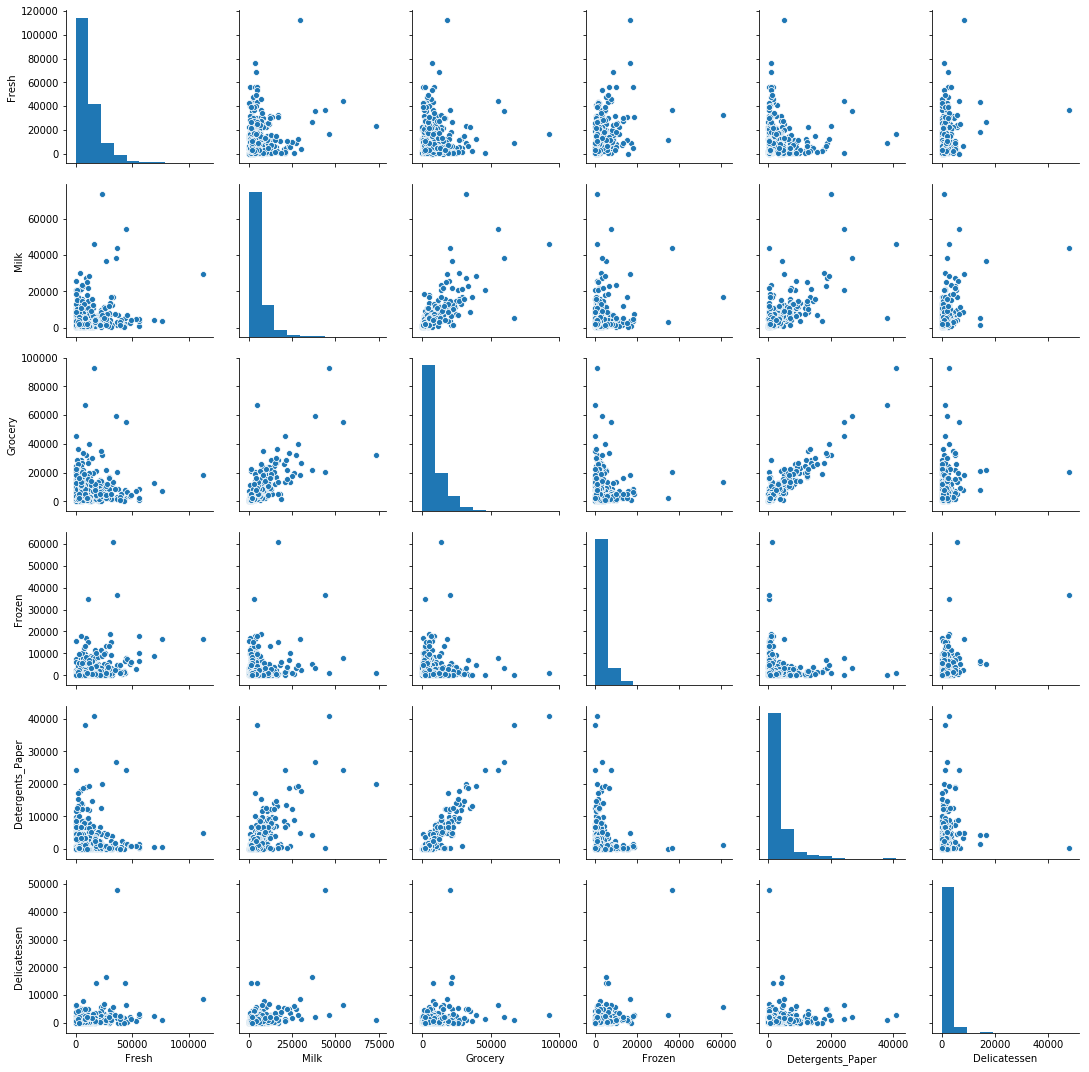

In [61]:
import seaborn as sns
sns.pairplot(data);

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

1.   Markets would have higher fresh produce
2.  Delis and Cafes would have more milk, frozen and delicatessen
3.  Retailers would have higher purchases of milk, grocery, detergents_paper, and fresh
4.  Restaurants would have greater purchases of fresh, grocery and milk
    

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import pprint

# Loop through each feature to remove one and see the scoring metrics

col_test = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
scores = []

score_dict = {}
for item in col_test:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.copy()
    new_data_X = new_data.drop(columns=[item],axis=1)
    new_data_y = new_data[item]

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data_X, new_data_y, test_size=0.33, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set

    y_pred = regressor.predict(X_test)


    score = r2_score(y_test, y_pred)
    scores.append(item)
    scores.append(score)
    score_dict[item] = score

    
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(score_dict)

{ 'Delicatessen': -15.960604272860156,
  'Detergents_Paper': 0.4284959672613957,
  'Fresh': -0.6676899275784978,
  'Frozen': -0.06540372140163497,
  'Grocery': 0.5857533632225022,
  'Milk': 0.22256195477719332}


In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
1. I attempted a loop where each of the six features is predicted by the rest and found an R2_score corresponding to each
2. Of the 6 options, Grocery, Detergents and Milk have a higher score and hence easier to predict
    - R2_score for Fresh was ~ - 0.63 and hence harder to predict, Delicatessen interestingly had an R2_score of -16 
3. Fresh could be relevant


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

**Probability Distribution**
A plot of probability with both histogram and kernel density was created to visually represent how the data was distributed.

The data seems normal but with outliers

C:\Users\ravij\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


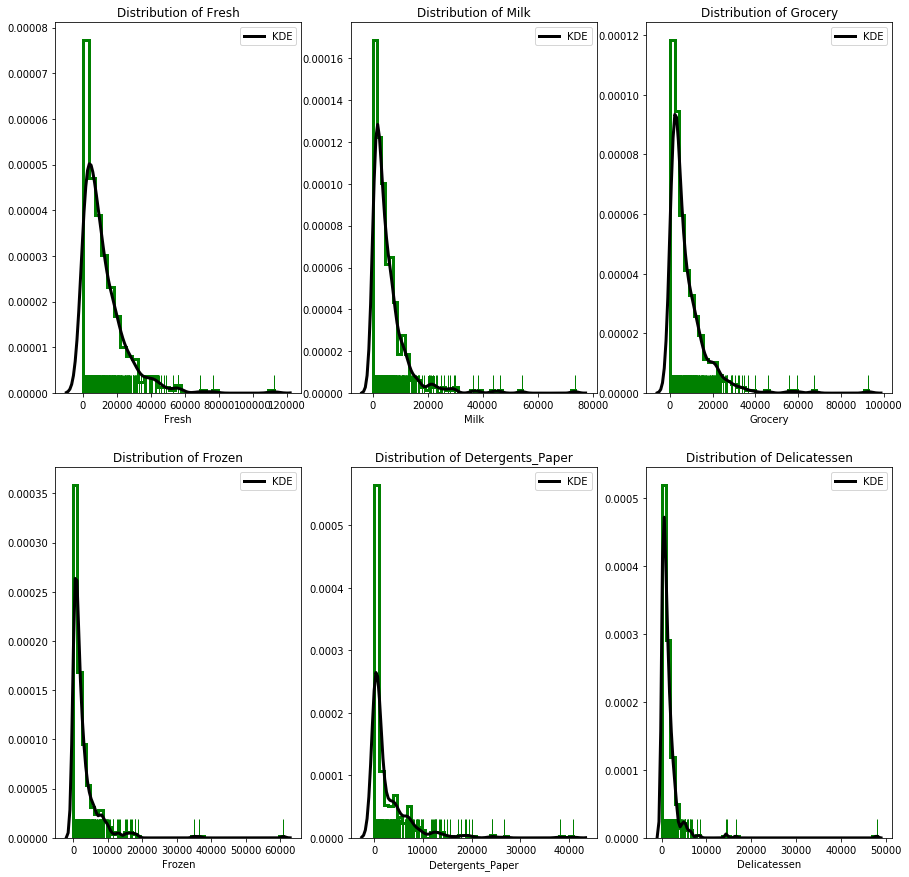

In [63]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


fig1 = plt.figure(figsize=(15,15))
gs1 = gridspec.GridSpec(2, 3)

ax1 = plt.subplot(gs1[0, 0])
ax1 = sns.distplot(data['Fresh'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"},).set_title("Distribution of Fresh");


ax2 = plt.subplot(gs1[0, 1])
ax2 = sns.distplot(data['Milk'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"},).set_title("Distribution of Milk");


ax3 = plt.subplot(gs1[0, 2])
ax3 = sns.distplot(data['Grocery'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"},).set_title("Distribution of Grocery");


ax4 = plt.subplot(gs1[1, 0])
ax4 = sns.distplot(data['Frozen'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"},).set_title("Distribution of Frozen");


ax5 = plt.subplot(gs1[1, 1])
ax5 = sns.distplot(data['Detergents_Paper'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"},).set_title("Distribution of Detergents_Paper");


ax6 = plt.subplot(gs1[1, 2])
ax6 = sns.distplot(data['Delicatessen'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"},).set_title("Distribution of Delicatessen");


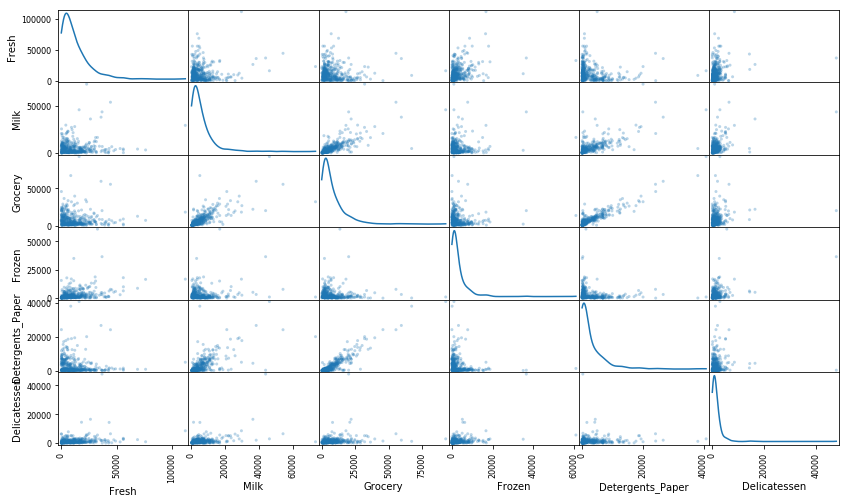

In [20]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

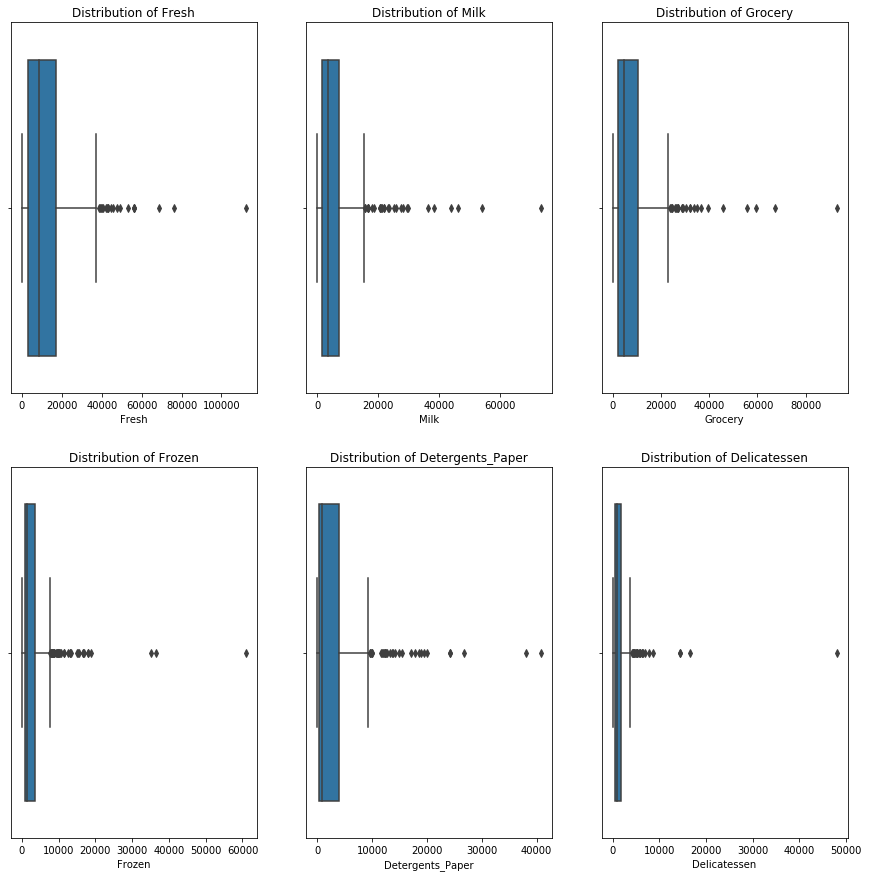

In [84]:
fig0 = plt.figure(figsize=(15,15))
gs0 = gridspec.GridSpec(2, 3)

ax1 = plt.subplot(gs0[0, 0])
ax1 = sns.boxplot(data['Fresh']).set_title("Distribution of Fresh");

ax2 = plt.subplot(gs0[0, 1])
ax2 = sns.boxplot(data['Milk']).set_title("Distribution of Milk");

ax3 = plt.subplot(gs0[0, 2])
ax3 = sns.boxplot(data['Grocery']).set_title("Distribution of Grocery");

ax4 = plt.subplot(gs0[1, 0])
ax4 = sns.boxplot(data['Frozen']).set_title("Distribution of Frozen");

ax5 = plt.subplot(gs0[1, 1])
ax5 = sns.boxplot(data['Detergents_Paper']).set_title("Distribution of Detergents_Paper");

ax6 = plt.subplot(gs0[1, 2])
ax6 = sns.boxplot(data['Delicatessen']).set_title("Distribution of Delicatessen");

In [21]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
    
-   The data shows a positively skewed distributed with a few outliers
-   Grocery is highly correlated with Milk and Detergents_Paper
-   It confirms the link between Grocery spend and the others
-   Given the positive skew as demonstrated by the scatter plots, the features would need to be transformed

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

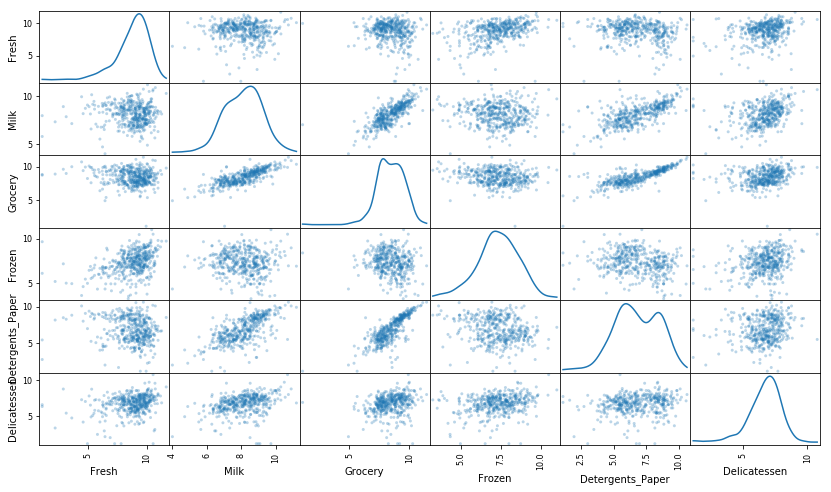

In [85]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = pd.DataFrame(log_data.loc[indices], columns = data.keys()).reset_index(drop = True)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

C:\Users\ravij\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


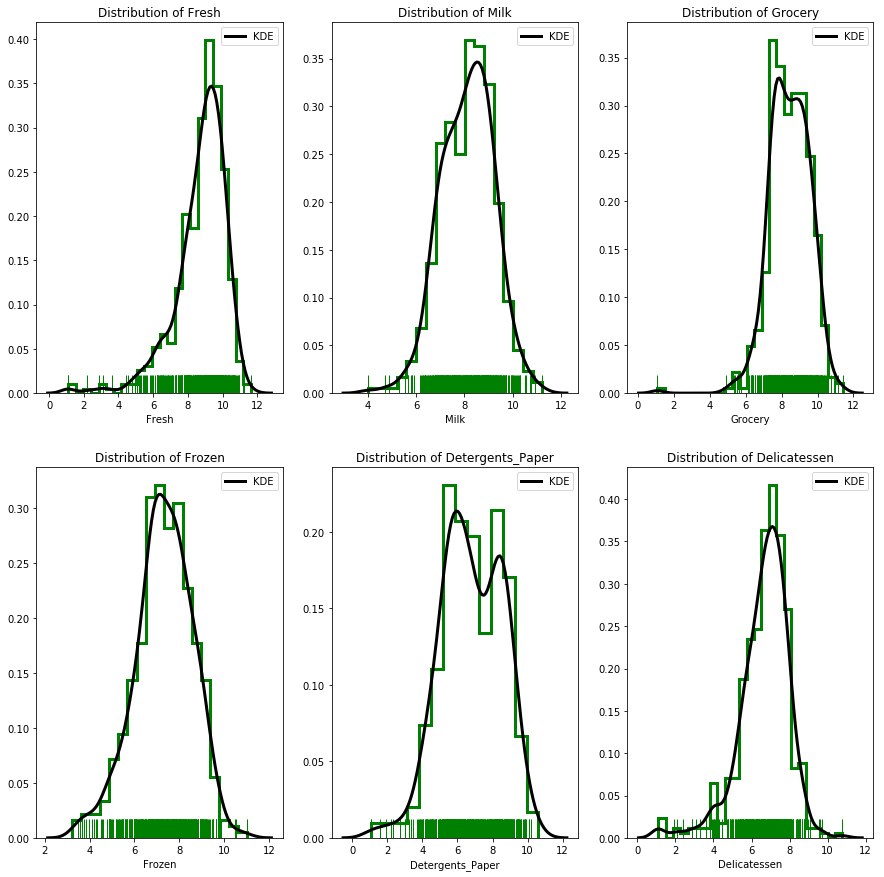

In [86]:
fig2 = plt.figure(figsize=(15,15))
gs2 = gridspec.GridSpec(2, 3)

ax1 = plt.subplot(gs2[0, 0])
ax1 = sns.distplot(log_data['Fresh'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"},).set_title("Distribution of Fresh");

ax2 = plt.subplot(gs2[0, 1])
ax2 = sns.distplot(log_data['Milk'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"},).set_title("Distribution of Milk");

ax3 = plt.subplot(gs2[0, 2])
ax3 = sns.distplot(log_data['Grocery'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"},).set_title("Distribution of Grocery");

ax4 = plt.subplot(gs2[1, 0])
ax4 = sns.distplot(log_data['Frozen'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"},).set_title("Distribution of Frozen");

ax5 = plt.subplot(gs2[1, 1])
ax5 = sns.distplot(log_data['Detergents_Paper'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"},).set_title("Distribution of Detergents_Paper");

ax6 = plt.subplot(gs2[1, 2])
ax6 = sns.distplot(log_data['Delicatessen'], rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"},).set_title("Distribution of Delicatessen");

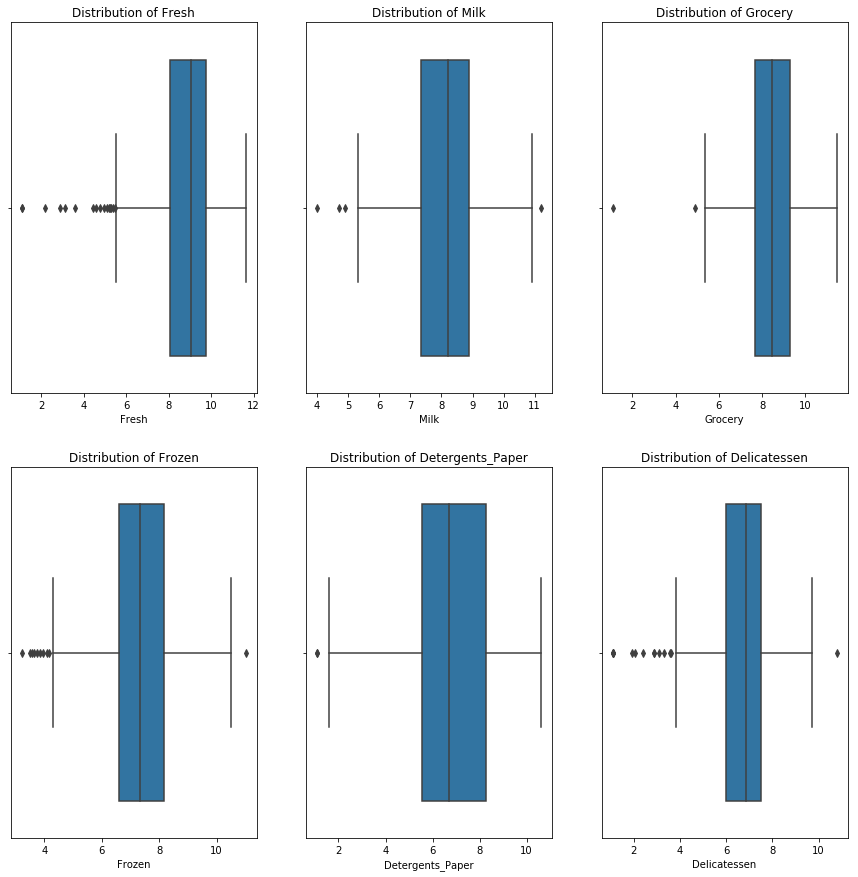

In [87]:
fig3 = plt.figure(figsize=(15,15))
gs3 = gridspec.GridSpec(2, 3)

ax1 = plt.subplot(gs3[0, 0])
ax1 = sns.boxplot(log_data['Fresh']).set_title("Distribution of Fresh");

ax2 = plt.subplot(gs3[0, 1])
ax2 = sns.boxplot(log_data['Milk']).set_title("Distribution of Milk");

ax3 = plt.subplot(gs3[0, 2])
ax3 = sns.boxplot(log_data['Grocery']).set_title("Distribution of Grocery");

ax4 = plt.subplot(gs3[1, 0])
ax4 = sns.boxplot(log_data['Frozen']).set_title("Distribution of Frozen");

ax5 = plt.subplot(gs3[1, 1])
ax5 = sns.boxplot(log_data['Detergents_Paper']).set_title("Distribution of Detergents_Paper");

ax6 = plt.subplot(gs3[1, 2])
ax6 = sns.boxplot(log_data['Delicatessen']).set_title("Distribution of Delicatessen");

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [88]:
log_data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


The correlation between Grocery, Milk and Detergents remains

In [89]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


In [90]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [91]:
print(np.percentile(log_data['Fresh'],25),\
      np.percentile(log_data['Fresh'],50),\
      np.percentile(log_data['Fresh'],75),\
      np.percentile(log_data['Fresh'],99))

8.048058702214819 9.048286105392618 9.73706394795268 10.934581061243875


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [92]:
log_data.keys()

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [93]:
# For each feature find the data points with extreme high or low values
outlier_check = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    out = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    out.index.values
    outlier_check.append(list(out.index.values))

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

from collections import Counter

dupes = [k for k,v in Counter([item for sublist in outlier_check for item in sublist]).items() if v>1]

outliers = list(set([item for sublist in outlier_check for item in sublist]))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

In [94]:
len(outliers)

42

In [95]:
dupes

[65, 66, 128, 154, 75]

**Answer:**
1. There are 42 outliers in the list 
2. Of these, 4 are repeated among 2 features
3. 1 is repeated among 3 features
4. Yes, these data points should be removed
- These should be removed as clusters, especially in k-means are dependent on the length and outliers could distort the picture and provide sub-optimal clusters 

In [96]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
Fresh               398 non-null float64
Milk                398 non-null float64
Grocery             398 non-null float64
Frozen              398 non-null float64
Detergents_Paper    398 non-null float64
Delicatessen        398 non-null float64
dtypes: float64(6)
memory usage: 18.7 KB


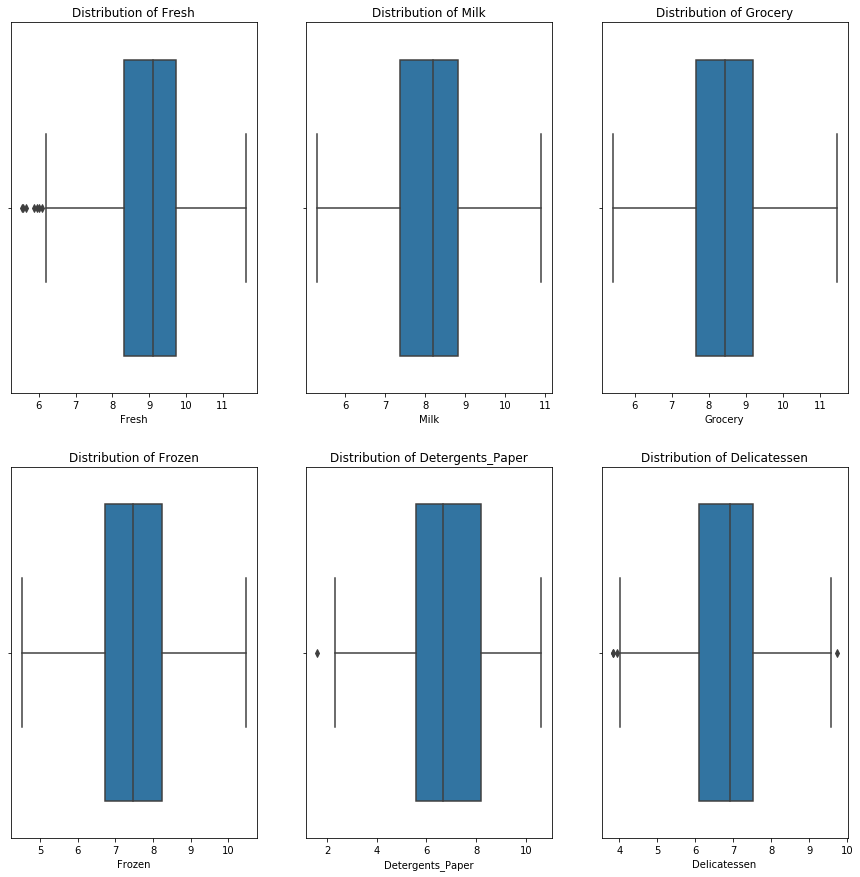

In [97]:
fig4 = plt.figure(figsize=(15,15))
gs4 = gridspec.GridSpec(2, 3)

ax1 = plt.subplot(gs4[0, 0])
ax1 = sns.boxplot(good_data['Fresh']).set_title("Distribution of Fresh");

ax2 = plt.subplot(gs4[0, 1])
ax2 = sns.boxplot(good_data['Milk']).set_title("Distribution of Milk");

ax3 = plt.subplot(gs4[0, 2])
ax3 = sns.boxplot(good_data['Grocery']).set_title("Distribution of Grocery");

ax4 = plt.subplot(gs4[1, 0])
ax4 = sns.boxplot(good_data['Frozen']).set_title("Distribution of Frozen");

ax5 = plt.subplot(gs4[1, 1])
ax5 = sns.boxplot(good_data['Detergents_Paper']).set_title("Distribution of Detergents_Paper");

ax6 = plt.subplot(gs4[1, 2])
ax6 = sns.boxplot(good_data['Delicatessen']).set_title("Distribution of Delicatessen");

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

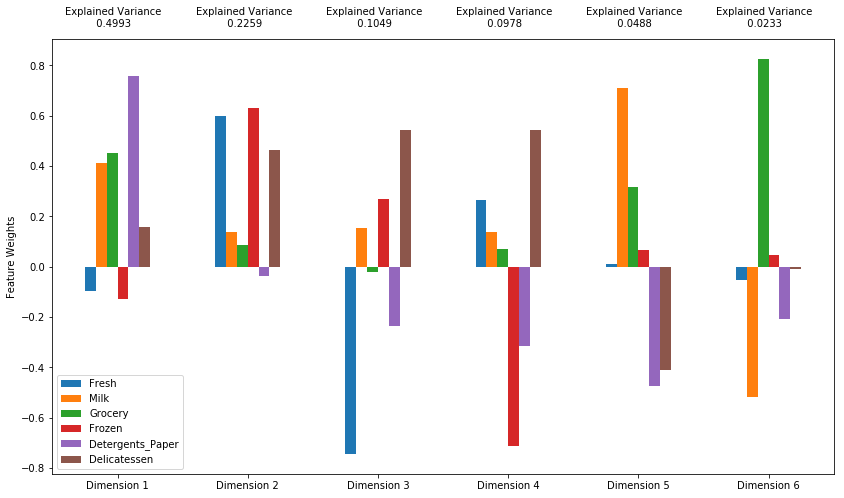

In [98]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)

pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [99]:
0.4993+0.2259+0.1049+0.0978

0.9279000000000001

**Answer:**
1. The first and the second principal components are able to explain ~0.5 and ~0.23 of the variance, thus making up ~0.73 of the variance
2. The first four principal components are able to explain 0.9279 of the variance
3. The first principal component explains the distribution of the Grocery, Milk and Detergents_paper 
    -  Could corresponding to retail outlets
4. The second principal component explains the distribution of Fresh, Frozen and Delicatessen
    -  Could correspond to restaurants as there's fresh, frozen and delicatessen but low contributions from milk and grocery
5. The third principal component has contributions mainly from delicatessen, frozen and milk and negative for detergents and fresh 
    -  Could correspond to delis
6. The fourth principal component has higher contributions from delicatessen and fresh
    - could be salad shops

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [100]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,4.7265,3.4113,-0.2381,-0.0287,0.5103,-0.0973
1,2.6240,4.4608,-0.2695,0.1618,0.4241,-0.3959
2,-6.1727,0.1730,1.1190,2.2841,0.1175,-0.2175


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [101]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [102]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,4.7265,3.4113
1,2.6240,4.4608
2,-6.1727,0.1730


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

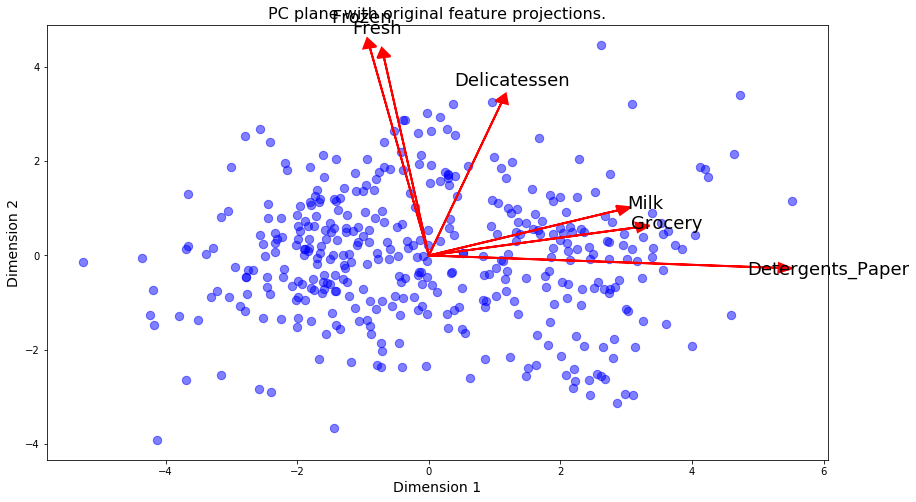

In [103]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
- K-Means assumes that a data point belongs to a cluster and then goes about minimizing the distance between points within the same cluster
- Gaussian Mixture applies probability functions to a data point of belonging to each of the clusters and then optimizes the probability function, thereby determining the cluster

Advantages of using a KMeans algorithm
- Simple to implement and easy to interpret the resulting clusters
- Works even some assumptions are broken;
- Fast and efficient in terms of compute cost

Advantages of the GaussianMixtuer
- This is better for complex shapes
- Leverages distribution functions which in some cases are a better descriptor of the relationships between the data points
- In reality, the data points could be influenced by multiple factors that are not completely independent of each other

I will leverage K-Means with multiple initial clusters to identify the optimal number of clusters
- I'll also verify the results that with GMM and DBScan


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [104]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=1).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds_KMeans = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds_KMeans, metric='euclidean')
print(score)

0.4471577422934671


#### Check multiple options for numbers of clusters and check sihlouette score to optimize the number of clusters

In [107]:
cluster_check = [2,3,4,5,6,7,8,9,10]
silhouette_score_check={}
for number_of_clusters in cluster_check:
    cluster_KMeans = KMeans(n_clusters=number_of_clusters,random_state=42).fit(reduced_data)
    predicted_cluster_KMeans = cluster_KMeans.predict(reduced_data)
    predicted_cluster_centers = cluster_KMeans.cluster_centers_
    silhouette_score_check[number_of_clusters] = silhouette_score(reduced_data, predicted_cluster_KMeans, metric='euclidean')
    
pprint.PrettyPrinter(indent=2).pprint(silhouette_score_check)

{ 2: 0.4471577422934671,
  3: 0.363986479840174,
  4: 0.33115095428456565,
  5: 0.3531934032870773,
  6: 0.3637123460943406,
  7: 0.355334447306445,
  8: 0.36899142962657316,
  9: 0.3674528671070344,
  10: 0.3456848481001825}


In [108]:
from sklearn.metrics import calinski_harabaz_score
from sklearn.cluster import DBSCAN

eps=[1, 2]
min_samples = [22, 23, 24, 25]
#cluster_check = [2,3,4,5,6,7,8,9,10]
CH_score_check=[]
for ep in eps:
    for samp in min_samples:
        cluster_dbscan = DBSCAN(eps=ep, min_samples=samp).fit(reduced_data)
        predicted_cluster_dbscan = cluster_dbscan.fit_predict(reduced_data)
        CH_score_check.append(calinski_harabaz_score(reduced_data, predicted_cluster_dbscan))

pprint.PrettyPrinter(indent=2).pprint(CH_score_check)

[ 0.5653706456267983,
  0.8764823528874824,
  16.771956467268627,
  13.513773822498788,
  4.545550526368465,
  4.545550526368465,
  4.545550526368465,
  4.545550526368465]


In [109]:
cluster_dbscan = DBSCAN(1, 24).fit(reduced_data)
preds_dbscan = cluster_dbscan.fit_predict(reduced_data)

In [110]:
df_dbscan_1_24 = pd.DataFrame(preds_dbscan,columns = ['Cluster'])
df_dbscan_1_24['Cluster'].value_counts()

 0    352
-1     46
Name: Cluster, dtype: int64

In [111]:
from sklearn.mixture import GaussianMixture
cluster_check = [2,3,4,5,6,7,8,9,10]
silhouette_score_check={}
for number_of_clusters in cluster_check:
    cluster_gaussian = GaussianMixture(n_components=number_of_clusters,random_state=42,init_params='random').fit(reduced_data)
    predicted_cluster_gaussian = cluster_gaussian.predict(reduced_data)
    silhouette_score_check[number_of_clusters] = silhouette_score(reduced_data, predicted_cluster_gaussian, metric='euclidean')
    
pprint.PrettyPrinter(indent=2).pprint(silhouette_score_check)


{ 2: 0.31107033166731374,
  3: 0.18822419011445332,
  4: 0.10633360287345114,
  5: 0.2689984445258079,
  6: 0.08851753891511593,
  7: 0.23180856659890167,
  8: 0.0627152413726154,
  9: 0.20965798871454105,
  10: 0.16180099542937987}


In [112]:
cluster_gaussian = GaussianMixture(n_components=2,random_state=42,init_params='random').fit(reduced_data)
preds_GMM = cluster_gaussian.predict(reduced_data)

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

|Number of clusters|Silhoutte Score|
|:----------------:|:-------------:|
|       2          |     0.447     |
|       3          |     0.364     |
|       4          |     0.331     |
|       5          |     0.353     |
|       6          |     0.364     |
|       7          |     0.355     |
|       8          |     0.369     |
|       9          |     0.367     |
|      10          |     0.346     |


2 clusters seem to have the best sihlouette score

This has also been confirmed with sihlouette score for the GaussianMixture method as well as the CH index for DBSCAN

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

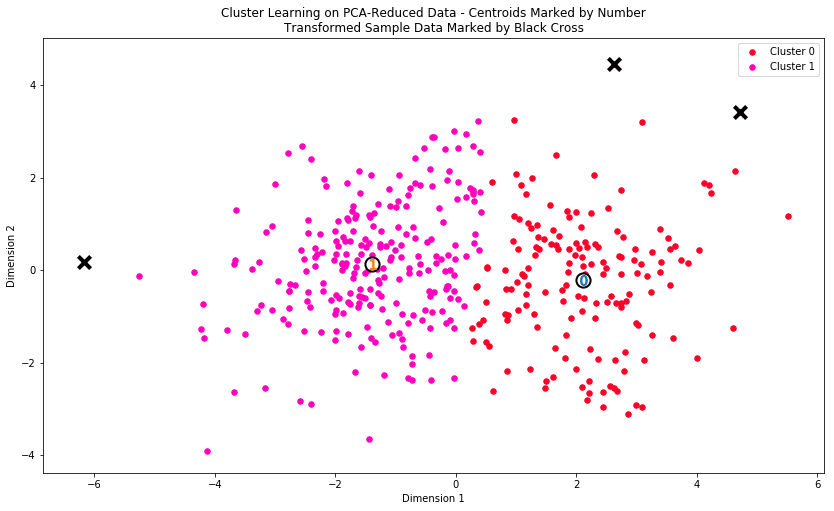

In [113]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds_KMeans, centers, pca_samples)

In [114]:
dbscan_clusters = pd.concat([pd.DataFrame(preds_dbscan,columns = ['Cluster']), reduced_data], axis = 1)
KMeans_clusters = pd.concat([pd.DataFrame(preds_KMeans,columns = ['Cluster']), reduced_data], axis = 1)
GMM_clusters = pd.concat([pd.DataFrame(preds_GMM,columns = ['Cluster']), reduced_data], axis = 1)


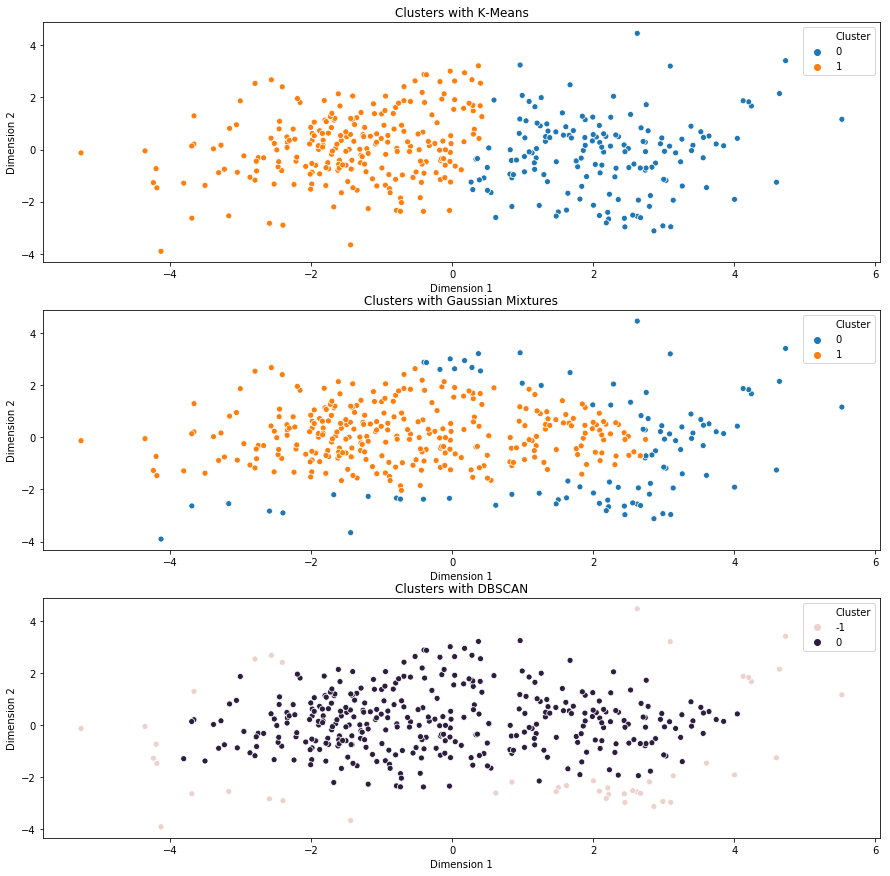

In [115]:
fig5 = plt.figure(figsize=(15,15))
gs5 = gridspec.GridSpec(3, 1)

ax1 = plt.subplot(gs5[0, 0])
ax1 = sns.scatterplot(data=KMeans_clusters,x = 'Dimension 1', y = 'Dimension 2',hue='Cluster').set_title('Clusters with K-Means');

ax2 = plt.subplot(gs5[1, 0])
ax2 = sns.scatterplot(data=GMM_clusters,x = 'Dimension 1', y = 'Dimension 2',hue='Cluster').set_title('Clusters with Gaussian Mixtures');

ax3 = plt.subplot(gs5[2, 0])
ax3 = sns.scatterplot(data=dbscan_clusters,x = 'Dimension 1', y = 'Dimension 2',hue='Cluster').set_title('Clusters with DBSCAN');

**Interpretation of the cluster visualizations**
Based on the 3 plots above, the K-Means clustering algorithm seems to distinguish the clusters better-
- The DBSCAN algorithm seems to pick out the extremes as an alternate cluster
- The Gaussian Mixtures model also exhibits somewhat similar behavior - It may need a really large dataset with thousands of samples to be able to leverage the normality better
- The KMeans model shows a clearer distinction between the clusters

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [119]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0
Segment 1,9451.0,1938.0,2449.0,2200.0,307.0,771.0


In [120]:
true_centers['Total'] = true_centers['Fresh'] + true_centers['Milk'] + true_centers['Grocery'] + \
true_centers['Frozen'] + true_centers['Detergents_Paper'] + true_centers['Delicatessen'] 

In [121]:
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Segment 0,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0,31439.0
Segment 1,9451.0,1938.0,2449.0,2200.0,307.0,771.0,17116.0


In [122]:
data.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [129]:
data.quantile([0.1, 0.2, 0.3,0.35,0.4,0.5, 0.6, 0.7,0.75, 0.8,0.9])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0.10,915.60,889.80,1381.90,281.30,99.6,180.80
0.20,2609.40,1273.20,1980.80,559.80,216.6,325.40
0.30,4318.80,1893.80,2472.50,859.30,323.2,524.80
0.35,5250.00,2174.30,2851.10,953.25,396.3,628.00
0.40,6135.80,2668.20,3315.60,1118.40,488.4,711.20
0.50,8504.00,3627.00,4755.50,1526.00,816.5,965.50
0.60,11148.40,4886.20,6546.40,2206.20,1484.4,1216.20
0.70,14465.90,6282.90,8950.10,2996.80,3164.0,1555.40
0.75,16933.75,7190.25,10655.75,3554.25,3922.0,1820.25
0.80,18829.60,8271.80,12125.60,4429.40,4630.0,2127.40


- Avg Customer in Segment 0 has a spend ~ 30-40 %-ile in Fresh, Frozen, 70-80 %-ile in Milk, Grocery, Detergents_Paper
- Avg customer in Segment 1 has a spend in the 50-60 %-ile in Fresh, Frozen, 30-40 %-ile in Milk, Grocery and Detergents_Paper
- Spend in delicatessen isnt  determinant in the customer's cluster

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
    - A customer assigned to Segment 0 (more likely a retail store) would spend higher amounts, with larger composition of grocery, milk, fresh produce and detergents purchased
    - A customer assigned to other segment (more likely a restaurant or cafe) would spend lower than that with a greater mix of fresh produce, and grocery

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [99]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6006,11093,18881,1159,7425,2098
1,56159,555,902,10002,212,2916
2,4967,21412,28921,1798,13583,1163
3,16117,46197,92780,1026,40827,2944
4,3,2920,6252,440,223,709
5,36847,43950,20170,36534,239,47943


In [130]:
samples_copy = samples.copy()
samples_copy['Total'] = samples_copy['Fresh'] + samples_copy['Milk'] + samples_copy['Grocery'] + \
samples_copy['Frozen'] + samples_copy['Detergents_Paper'] + samples_copy['Delicatessen'] 

In [61]:
samples_copy

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,6006,11093,18881,1159,7425,2098,46662
1,56159,555,902,10002,212,2916,70746
2,4967,21412,28921,1798,13583,1163,71844
3,16117,46197,92780,1026,40827,2944,199891
4,3,2920,6252,440,223,709,10547
5,3,333,7021,15601,15,550,23523
6,36847,43950,20170,36534,239,47943,185683


In [131]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**
    
Points 0, and 1 seem to belong to the cluster with higher average spend with larger Grocery, Fresh and Detergent
2  belongs to the other cluster with greater mix of fresh, frozen

These are borne out by the predicted clusters

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The change in delivery schedules from 5 days a week to 3 days a week would result in impact to the inventory of products in the customer premise
- A large volumes customer may be impacted if there are inventory shortfalls due to changed delivery schedules
- A customer who relies on Fresh produce may find that the Fresh produce is no longer fresh in case the delivery schedule is impacted
#### A/B Test parameters
The A/B test needs to test the change in delivery schedule first in cluster 0 with clearly identified controls and treatment groups. It would be vital to further do this over a specified period of time to ensure adequate feedback is obtained.
Care needs to be taken to ensure the control and treatment groups are properly identified prior to the testing process

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
    
    Here the customer segment label is just either cluster 0 or 1 based on the cluster determined.
    This can then be used to train a decision tree or logistic regression or an adaboost classifier to determine a customer segment algorithm
    With that, the new customers could then be labeled using this algorithm
    
    This however will need to be checked on a periodic basis if the underlying algorithm assumptions continue to remain valid or not
    

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

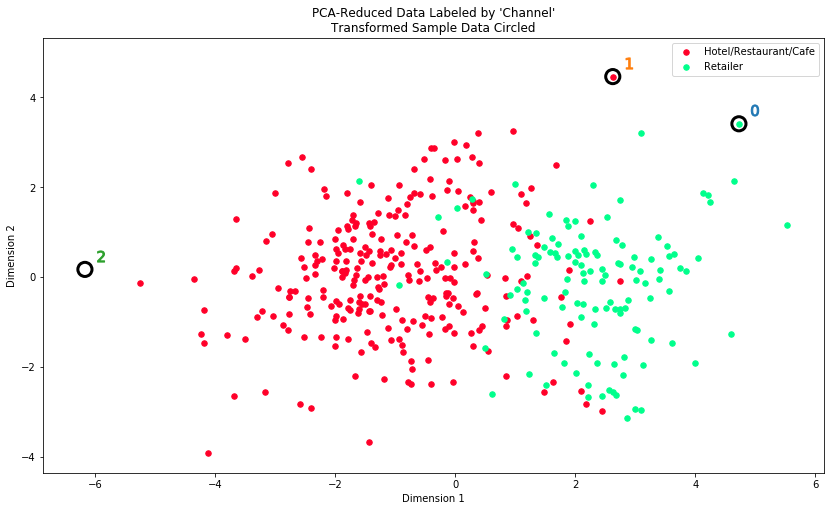

In [132]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
- The clustering algorithm seems to match well the underlying distribution of the Hotel/Retail/Cafe vs Retail customers
- The closer the customer is towards the center of the respective cluster, the greater the chance that the customer belongs to that segment
- Yes, these are consistent with the previous definition of the customer segments

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.